# Music Data Analysis through SQL

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files =["album.csv", "artist.csv", "customer.csv", "employee.csv", "genre.csv", "invoice.csv", "invoice_line.csv", "media_type.csv","playlist.csv", "playlist_track.csv", "track.csv" ]
dataframes = {}

In [3]:
for file in files:
    dataframe_name = file.split(".")[0]  # Extract the name without the extension
    dataframes[dataframe_name] = pd.read_csv(file)

In [4]:
conn = sqlite3.connect(":memory:")

for table_name, dataframe in dataframes.items():
    dataframe.to_sql(table_name, conn, index=False)

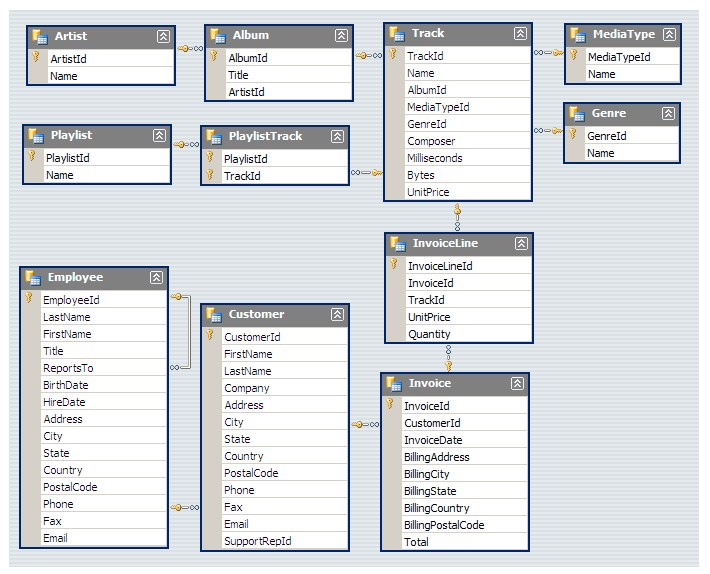

# Question Set 1 - Easy

###  1.1  Which countries have the most Invoices?

In [16]:
country = pd.read_sql('''
    select billing_country,  COUNT(*) AS country_count
    FROM invoice
    GROUP BY billing_country
    ORDER BY country_count DESC
    LIMIT 10;
''',  conn)
country

,billing_country,country_count
0,USA,131
1,Canada,76
2,Brazil,61
3,France,50
4,Germany,41
5,Czech Republic,30
6,Portugal,29
7,United Kingdom,28
8,India,21
9,Ireland,13


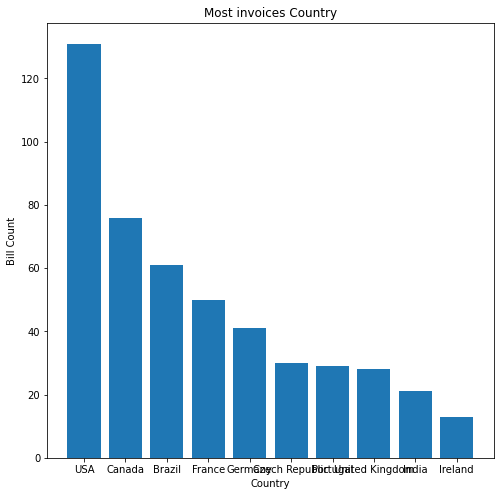

In [21]:
plt.figure(figsize = (8,8))
plt.bar(country['billing_country'], country['country_count'])
plt.xlabel('Country')
plt.ylabel('Bill Count')
plt.title('Most invoices Country')
plt.show()

###  1.2 Who is the senior most employee based on job title?

In [6]:
senior_employee = pd.read_sql("select * from  employee order by levels desc limit 1;", conn)
senior_employee

,employee_id,last_name,first_name,title,reports_to,levels,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,9,Madan,Mohan,Senior General Manager,None,L7,26-01-1961,14-01-2016,1008 Vrinda Ave MT,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,madan.mohan@chinookcorp.com


###  1.3 What are top 3 values of total invoice?

In [7]:
top_invoice = pd.read_sql("select * from invoice order by total desc limit 3", conn)
top_invoice

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,183,42,2018-02-09 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,23.76
1,31,3,2017-02-21 00:00:00,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,19.80
2,92,32,2017-07-02 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,19.80


###  1.4     Which city has the best customers? We would like to throw a promotional Music Festival in the city              we made the most money. Write a query that returns one city that has the highest sum of invoice totals.               Return both the city name & sum of all invoice totals


In [8]:
best_customer_city = pd.read_sql('''select billing_city as city, sum(total) as totals from invoice 
                                    group by billing_city order by totals desc limit 10;''', conn)
best_customer_city

,city,totals
0,Prague,273.24
1,Mountain View,169.29
2,London,166.32
3,Berlin,158.40
4,Paris,151.47
5,São Paulo,129.69
6,Dublin,114.84
7,Delhi,111.87
8,São José dos Campos,108.90
9,Brasília,106.92


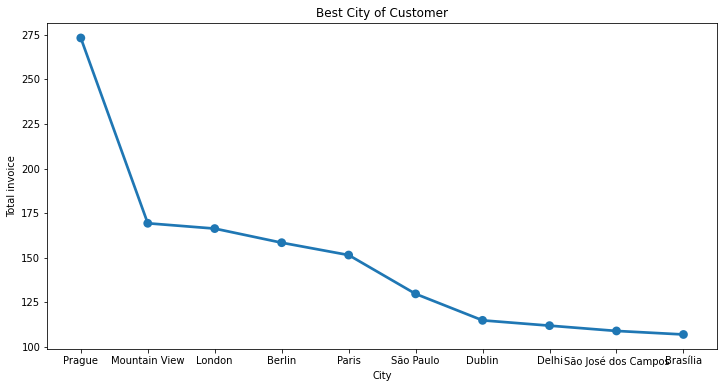

In [26]:
plt.figure(figsize = (12,6))
sns.pointplot(x=best_customer_city['city'], y=best_customer_city['totals'], ci=95)
plt.xlabel('City')
plt.ylabel('Total invoice')
plt.title('Best City of Customer')
plt.show()

### 1.5 Who is the best customer? The customer who has spent the most money will be declared the best customer. Write a query that returns the person who has spent the most money.

In [9]:
 best_customer =   pd.read_sql('''select customer.customer_id, customer.first_name, customer.last_name,
                                   sum(invoice.total) as total from customer
                                    join invoice on customer.customer_id = invoice.customer_id
                                    group by customer.customer_id
                                    order by total desc limit 5;''', conn)
best_customer

,customer_id,first_name,last_name,total
0,5,František,Wichterlová,144.54
1,6,Helena,Holý,128.70
2,46,Hugh,O'Reilly,114.84
3,58,Manoj,Pareek,111.87
4,1,Luís,Gonçalves,108.90


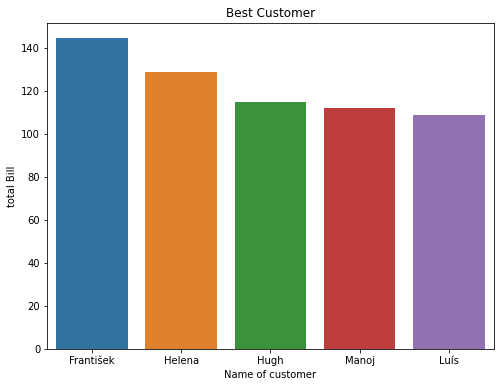

In [29]:
plt.figure(figsize= (8,6))
sns.barplot(x='first_name', y='total', data=best_customer)
plt.xlabel('Name of customer')
plt.ylabel('total Bill')
plt.title('Best Customer')
plt.show()


## Question Set 2 – Moderate

### 2.1   Write query to return the email, first name, last name, & Genre of all Rock Music listeners. Return your list ordered alphabetically by email starting with A.


In [10]:
Rock_listner = pd.read_sql('''SELECT DISTINCT email, first_name, last_name
                         FROM customer
                         JOIN invoice ON customer.customer_id = invoice.customer_id
                         JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id
                         WHERE track_id IN (SELECT track_id FROM track
                                            JOIN genre ON track.genre_id = genre.genre_id
                                            WHERE genre.name LIKE 'Rock')
                         ORDER BY email;''', conn)
Rock_listner

,email,first_name,last_name
0,aaronmitchell@yahoo.ca,Aaron,Mitchell
1,alero@uol.com.br,Alexandre,Rocha
2,astrid.gruber@apple.at,Astrid,Gruber
3,bjorn.hansen@yahoo.no,Bjørn,Hansen
4,camille.bernard@yahoo.fr,Camille,Bernard
5,daan_peeters@apple.be,Daan,Peeters
6,diego.gutierrez@yahoo.ar,Diego,Gutiérrez
7,dmiller@comcast.com,Dan,Miller
8,dominiquelefebvre@gmail.com,Dominique,Lefebvre
9,edfrancis@yachoo.ca,Edward,Francis


### 2.2   Let's invite the artists who have written the most rock music in our dataset. Write a query that returns the Artist name and total track count of the top 10 rock bands.

In [11]:
top10_rock = pd.read_sql('''
                            select artist.artist_id, artist.name, count(artist.artist_id) as total_songs from track
                            join album on album.album_id = track.album_id
                            join artist on artist.artist_id = album.artist_id
                            join genre on genre.genre_id = track.genre_id
                            where genre.name like 'Rock'
                            group by artist.artist_id
                            order by total_songs desc limit 10;
''', conn)
top10_rock

,artist_id,name,total_songs
0,22,Led Zeppelin,114
1,150,U2,112
2,58,Deep Purple,92
3,90,Iron Maiden,81
4,118,Pearl Jam,54
5,152,Van Halen,52
6,51,Queen,45
7,142,The Rolling Stones,41
8,76,Creedence Clearwater Revival,40
9,52,Kiss,35


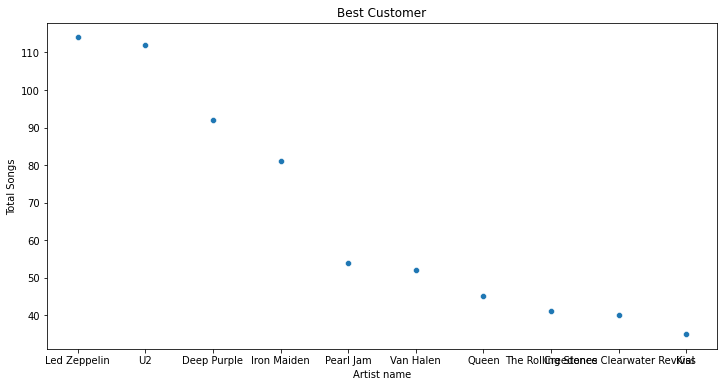

In [34]:
plt.figure(figsize= (12,6))
sns.scatterplot(x='name', y='total_songs', data=top10_rock)
plt.xlabel('Artist name')
plt.ylabel('Total Songs')
plt.title('Best Customer')
plt.show()

###  2.3   Return all the track names that have a song length longer than the average song length. Return the Name and Milliseconds for each track. Order by the song length with the longest songs listed first.


In [40]:
song_length = pd.read_sql('''
                            select name, milliseconds from track 
                            where milliseconds > (select avg(milliseconds) as avg_time from track)
                            order by milliseconds desc limit 10;
''', conn)
song_length

,name,milliseconds
0,Occupation / Precipice,5286953
1,Through a Looking Glass,5088838
2,"Greetings from Earth, Pt. 1",2960293
3,The Man With Nine Lives,2956998
4,"Battlestar Galactica, Pt. 2",2956081
5,"Battlestar Galactica, Pt. 1",2952702
6,Murder On the Rising Star,2935894
7,"Battlestar Galactica, Pt. 3",2927802
8,Take the Celestra,2927677
9,Fire In Space,2926593


In [41]:
song_length['minutes'] = song_length['milliseconds']/60000

In [44]:
song_length = song_length.drop('milliseconds', axis = 1)

In [45]:
song_length

,name,minutes
0,Occupation / Precipice,88.115883
1,Through a Looking Glass,84.813967
2,"Greetings from Earth, Pt. 1",49.338217
3,The Man With Nine Lives,49.283300
4,"Battlestar Galactica, Pt. 2",49.268017
5,"Battlestar Galactica, Pt. 1",49.211700
6,Murder On the Rising Star,48.931567
7,"Battlestar Galactica, Pt. 3",48.796700
8,Take the Celestra,48.794617
9,Fire In Space,48.776550


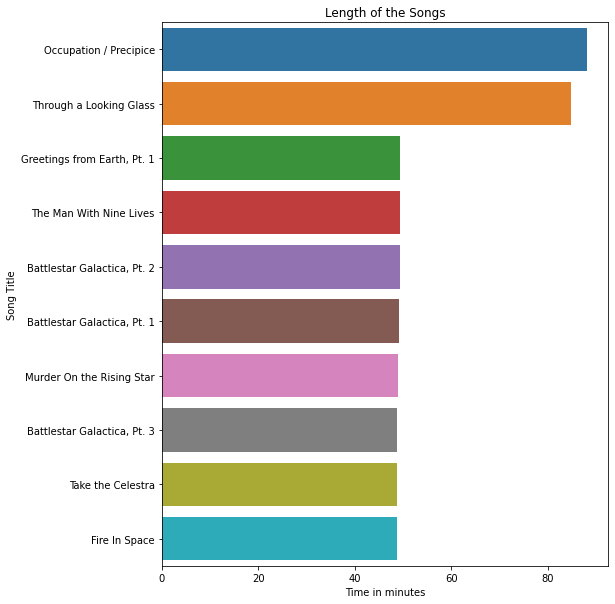

In [47]:
plt.figure(figsize= (8,10))
sns.barplot(x='minutes', y='name', data=song_length)
plt.xlabel('Time in minutes')
plt.ylabel('Song Title')
plt.title('Length of the Songs')
plt.show()


##  Question Set 3 – Advance

###  3.1  Find how much amount spent by each customer on artists? Write a query to return customer name, artist name and total spent.

In [13]:
top_customer_spent = pd.read_sql('''
    WITH best_selling_artist AS (
        SELECT
            artist.artist_id AS artist_id,
            artist.name AS artist_name,
            SUM(invoice_line.unit_price * invoice_line.quantity) AS total_sales
        FROM
            invoice_line
            JOIN track ON track.track_id = invoice_line.track_id
            JOIN album ON album.album_id = track.album_id
            JOIN artist ON artist.artist_id = album.artist_id
        GROUP BY artist.artist_id, artist.name
        ORDER BY total_sales DESC
        LIMIT 3
    )
    SELECT
        c.customer_id,
        c.first_name,
        c.last_name,
        bsa.artist_name,
        SUM(il.unit_price * il.quantity) AS amount
    FROM
        invoice i 
        JOIN customer c ON c.customer_id = i.customer_id
        JOIN invoice_line il ON il.invoice_id = i.invoice_id
        JOIN track t ON t.track_id = il.track_id
        JOIN album al ON al.album_id = t.album_id
        JOIN best_selling_artist bsa ON bsa.artist_id = al.artist_id
    GROUP BY c.customer_id, c.first_name, c.last_name, bsa.artist_name
    ORDER BY amount DESC limit 10;
''', conn)
top_customer_spent

,customer_id,first_name,last_name,artist_name,amount
0,46,Hugh,O'Reilly,Queen,27.72
1,38,Niklas,Schröder,Queen,18.81
2,46,Hugh,O'Reilly,Nirvana,18.81
3,3,François,Tremblay,Queen,17.82
4,3,François,Tremblay,Jimi Hendrix,16.83
5,6,Helena,Holý,Jimi Hendrix,16.83
6,12,Roberto,Almeida,Jimi Hendrix,16.83
7,27,Patrick,Gray,Nirvana,16.83
8,28,Julia,Barnett,Jimi Hendrix,16.83
9,34,João,Fernandes,Jimi Hendrix,16.83


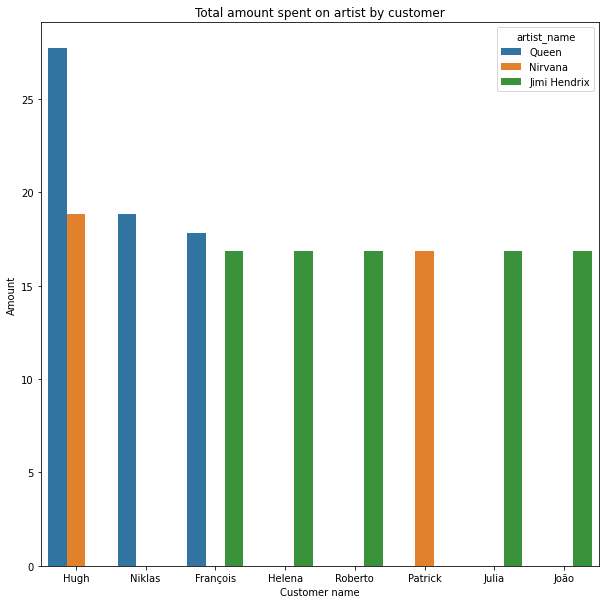

In [49]:
plt.figure(figsize= (10,10))
sns.barplot(data=top_customer_spent, x='first_name', y='amount',hue='artist_name',  )
plt.xlabel('Customer name')
plt.ylabel('Amount')
plt.title('Total amount spent on artist by customer')
plt.show()

###  3.2   We want to find out the most popular music Genre for each country. We determine the most popular genre as the genre with the highest amount of purchases. Write a query that returns each country along with the top Genre. For countries where the maximum number of purchases is shared return all Genres.

In [50]:
popular_music_country = pd.read_sql('''  
                                     with popular_genre as  ( select count(invoice_line.quantity) as purchases, customer.country as country,
                                     genre.name as genre_name, genre.genre_id as genre_id, 
                                     Rank() over(partition by customer.country order by count(invoice_line.quantity)desc)
                                     as rank from invoice_line
                                     join invoice on invoice.invoice_id = invoice_line.invoice_id
                                     join customer on customer.customer_id = invoice.customer_id
                                     join track on track.track_id = invoice_line.track_id
                                     join genre on genre.genre_id = track.genre_id
                                     group by 2, 3, 4
                                     order by 2 asc, 1 desc
                                     )
                                     select purchases, country, genre_name, genre_id from popular_genre where Rank <= 1
 ''', conn)
popular_music_country

,purchases,country,genre_name,genre_id
0,17,Argentina,Alternative & Punk,4
1,34,Australia,Rock,1
2,40,Austria,Rock,1
3,26,Belgium,Rock,1
4,205,Brazil,Rock,1
5,333,Canada,Rock,1
6,61,Chile,Rock,1
7,143,Czech Republic,Rock,1
8,24,Denmark,Rock,1
9,46,Finland,Rock,1


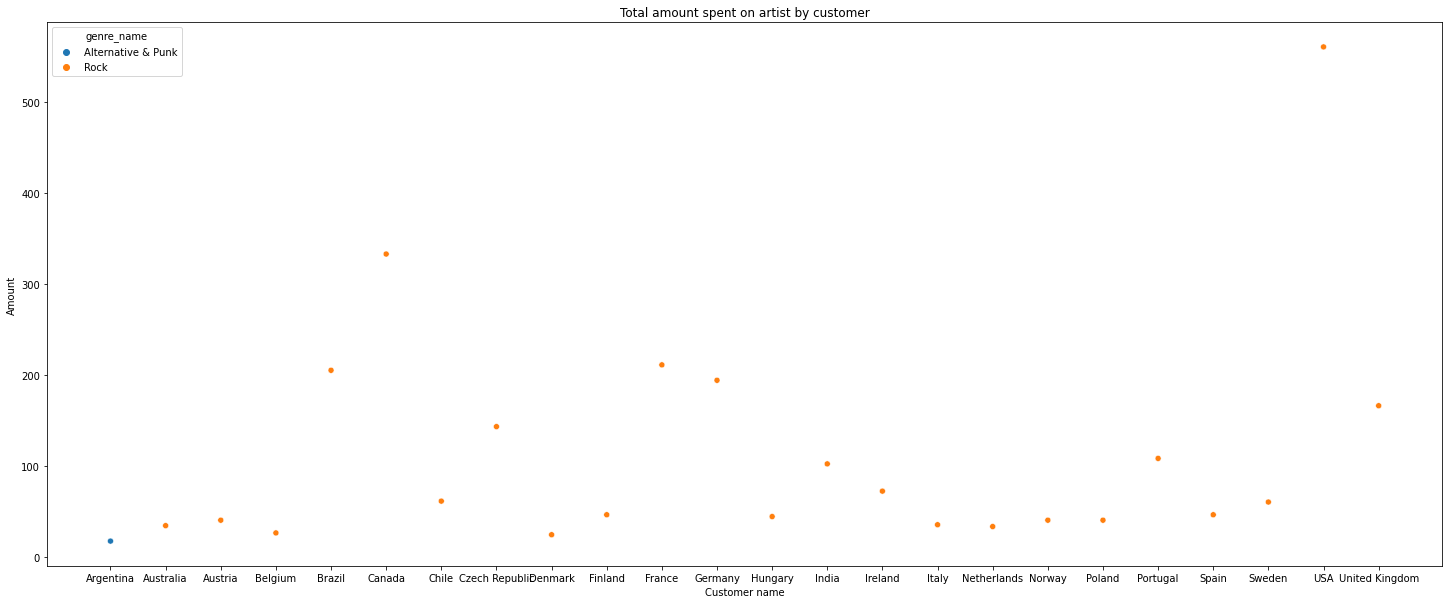

In [53]:
plt.figure(figsize= (25,10))
sns.scatterplot(data=popular_music_country, x='country', y='purchases',hue='genre_name',  )
plt.xlabel('Customer name')
plt.ylabel('Amount')
plt.title('Total amount spent on artist by customer')
plt.show()

## 3.3  Write a query that determines the customer that has spent the most on music for each country. Write a query that returns the country along with the top customer and how much they spent. For countries where the top amount spent is shared, provide all customers who spent this amount.

In [15]:
country_customer = pd.read_sql(''' 
                                    with customer_country as (select customer.customer_id as customer_id, first_name, last_name, billing_country,
                                    sum(total) as total_spent, Rank() over(partition by billing_country order by sum(total) desc) as rank from invoice
                                    join customer on customer.customer_id = invoice.customer_id
                                    group by 1, 2, 3, 4
                                    order by 4 asc, 5 desc)
                                    select customer_id, first_name, last_name, billing_country, total_spent
                                    from customer_country
                                    where rank <=1;
''', conn)
country_customer

,customer_id,first_name,last_name,billing_country,total_spent
0,56,Diego,Gutiérrez,Argentina,39.60
1,55,Mark,Taylor,Australia,81.18
2,7,Astrid,Gruber,Austria,69.30
3,8,Daan,Peeters,Belgium,60.39
4,1,Luís,Gonçalves,Brazil,108.90
5,3,François,Tremblay,Canada,99.99
6,57,Luis,Rojas,Chile,97.02
7,5,František,Wichterlová,Czech Republic,144.54
8,9,Kara,Nielsen,Denmark,37.62
9,44,Terhi,Hämäläinen,Finland,79.20


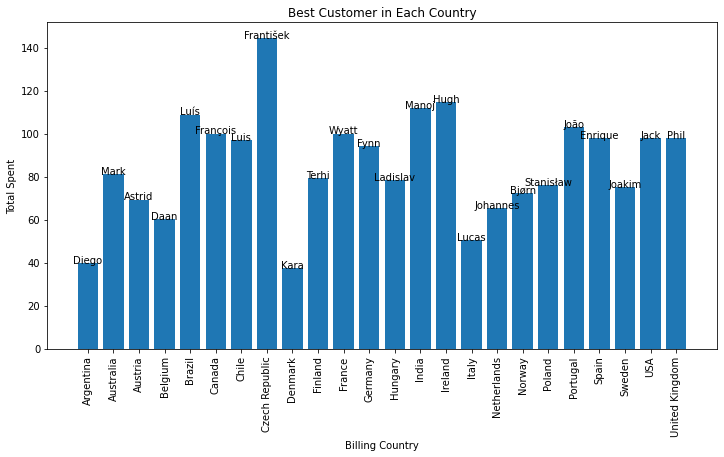

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(country_customer['billing_country'], country_customer['total_spent'])
plt.xlabel('Billing Country')
plt.ylabel('Total Spent')
plt.title('Best Customer in Each Country')
plt.xticks(rotation=90)

# Add customer names as labels on the bars
for i, val in enumerate(country_customer['first_name']):
    plt.text(i, country_customer['total_spent'].iloc[i], val, ha='center')

plt.show()

